In [ ]:
pip install google-colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [331]:
!ls /content/drive/MyDrive/DANO_2021

kickstarter_data.csv  val.csv


In [333]:
import matplotlib
matplotlib.use("Agg")

# подключаем необходимые пакеты
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from keras.layers.core import Dropout
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [334]:
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

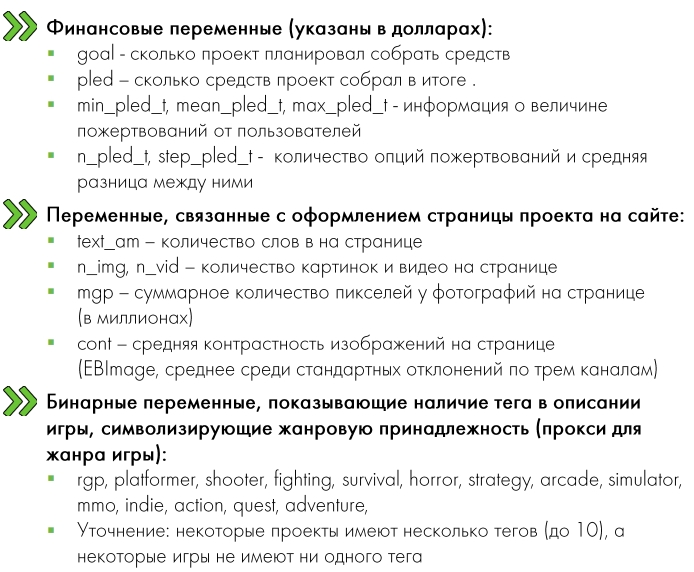

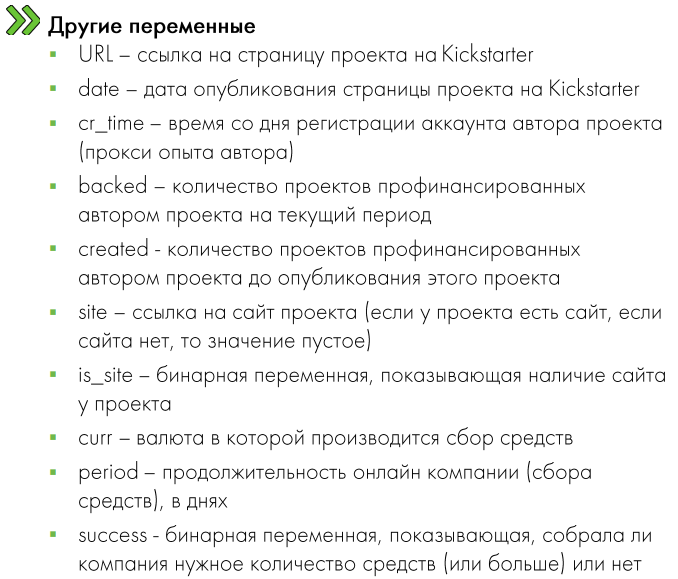

In [335]:
tb = pd.read_csv("/content/drive/MyDrive/DANO_2021/kickstarter_data.csv")

tb = tb.drop('URL', 1) # удаляем ссылку
tb = tb.drop('date', 1) # удаляем дату публикования
tb = tb.drop('curr', 1) # удаляем валюту, нужно переработать переводить все деньги в евро
tb = tb.drop('mgp', 1) # удаляем количество пикселей фото
tb = tb.drop('cont', 1) # удаляем контрастность фото
tb = tb.drop('site', 1) # удаляем ссылку на проект
tb = tb.drop('status', 1) # удаляем статус заявки

tb = tb.drop('min_pled_t', 1) # удаляем минимальное пожертвование
tb = tb.drop('max_pled_t', 1) # удаляем максимальное пожертвование
tb = tb.drop('step_pled_t', 1) # удаляем среднюю разницу между пожертованиями


tb = tb.drop('pled', 1) # удаляем сколько проект собрал

tb

,id,goal,period,text_am,n_img,n_vid,n_pled_t,mean_pled_t,cr_time,backed,created,rpg,platformer,shooter,fighting,survival,horror,strategy,arcade,simulator,mmo,indie,action,quest,adventure,success,is_site
0,8438,16368.00,14,355,7,0,8,1206.321250,16,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,3182,7278.02,30,2218,33,3,5,43.960000,592,3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1
2,7977,35000.00,31,3174,19,3,13,312.692308,253,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1270,10000.00,14,110,0,0,3,425.000000,195,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6312,67000.00,30,3955,46,1,15,165.866667,20,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,8202,7000.00,60,912,10,0,8,366.875000,191,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
7751,3125,15000.00,45,1650,39,2,23,733.434783,146,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7752,322,10000.00,30,280,10,1,9,67.888889,703,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7753,1098,3928.54,31,777,0,0,7,40.124286,93,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [337]:
val = pd.read_csv("/content/drive/MyDrive/DANO_2021/val.csv")

val = val.drop('URL', 1) # удаляем ссылку
val = val.drop('date', 1) # удаляем дату публикования
val = val.drop('curr', 1) # удаляем валюту, нужно переработать переводить все деньги в евро
val = val.drop('mgp', 1) # удаляем количество пикселей фото
val = val.drop('cont', 1) # удаляем контрастность фото
val = val.drop('site', 1) # удаляем ссылку на проект
val = val.drop('status', 1) # удаляем статус заявки

val = val.drop('min_pled_t', 1) # удаляем минимальное пожертвование
val = val.drop('max_pled_t', 1) # удаляем максимальное пожертвование
val = val.drop('step_pled_t', 1) # удаляем среднюю разницу между пожертованиями


val = val.drop('pled', 1) # удаляем сколько проект собрал

val

,id,goal,period,text_am,n_img,n_vid,n_pled_t,mean_pled_t,cr_time,backed,created,rpg,platformer,shooter,fighting,survival,horror,strategy,arcade,simulator,mmo,indie,action,quest,adventure,success,is_site
0,4812,125.00,30,418,0,0,6,11.333333,32,5,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2802,772.50,30,305,13,1,5,35.022000,551,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,2326,5376.83,30,158,0,0,5,33.156000,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3683,825.31,31,1103,14,1,10,124.256000,21,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,4229,90000.00,31,1546,16,1,11,578.636364,33,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,5358,16775.00,60,136,0,0,4,13.722500,594,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2116,8440,100000.00,30,567,0,1,4,262.500000,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2117,8073,60750.00,29,369,4,0,8,1903.250000,385,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2118,6551,21500.00,30,3508,51,0,14,96.428571,388,5,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1


In [338]:
train = tb.sample(frac = 0.8)
test = tb.drop(train.index).sample(frac = 0.5)

In [ ]:
test.head(5)

In [ ]:
train.head(5)

In [339]:
td = pd.concat([train, test], ignore_index=True, sort = False)

id             0
goal           0
period         0
text_am        0
n_img          0
n_vid          0
n_pled_t       0
mean_pled_t    0
cr_time        0
backed         0
created        0
rpg            0
platformer     0
shooter        0
fighting       0
survival       0
horror         0
strategy       0
arcade         0
simulator      0
mmo            0
indie          0
action         0
quest          0
adventure      0
success        0
is_site        0
dtype: int64

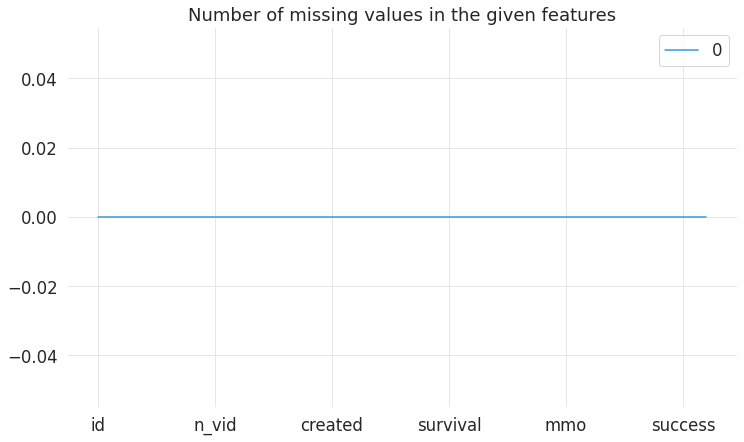

In [340]:
pd.DataFrame(td.isnull().sum()).plot.line().set_title("Number of missing values in the given features")
td.isnull().sum()

Text(0.5, 1.0, 'Missing values heatmap')

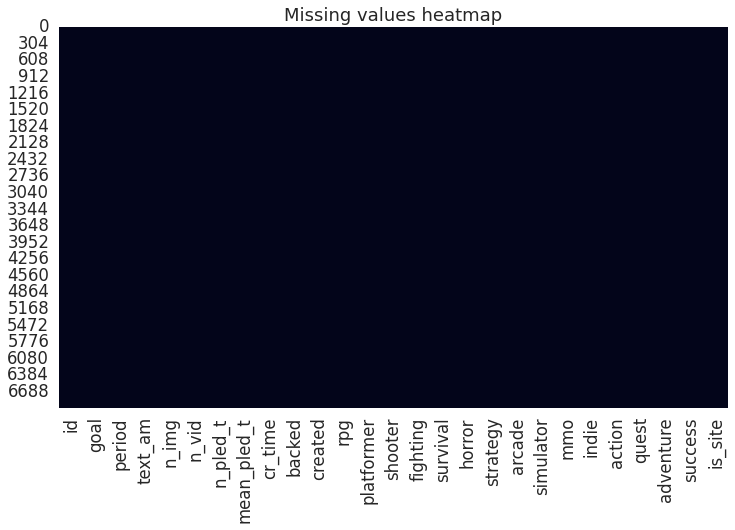

In [341]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [342]:
td.nunique()

id             6980
goal           2502
period           79
text_am        2631
n_img            97
n_vid            16
n_pled_t         46
mean_pled_t    5792
cr_time        1304
backed           91
created          14
rpg               2
platformer        2
shooter           2
fighting          2
survival          2
horror            2
strategy          2
arcade            2
simulator         2
mmo               2
indie             2
action            2
quest             2
adventure         2
success           2
is_site           2
dtype: int64

Text(0.5, 1.0, 'Training Data - Percentage of success projects')

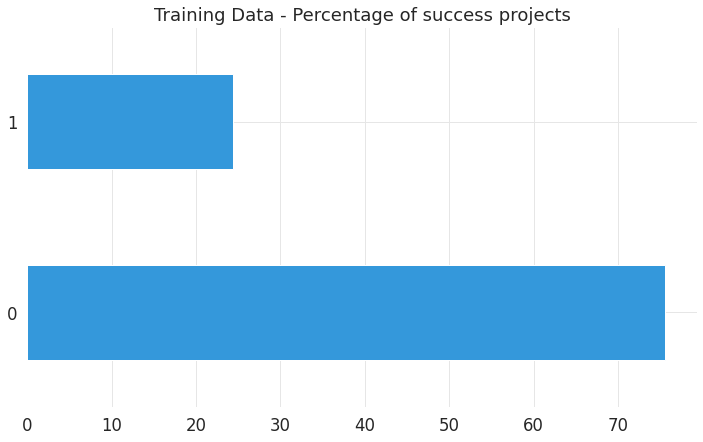

In [343]:
(train.success.value_counts(normalize=True) * 100).plot.barh().set_title("Training Data - Percentage of success projects")

In [344]:
X_to_be_predicted = td[td.success.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['success'], axis = 1)                                          

In [345]:
train_data = td
train_data = train_data.dropna()
feature_train = train_data['success']
label_train = train_data.drop(['success'], axis = 1)

In [315]:
clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train, np.ravel(y_train))
print("NB Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

NB Accuracy: 86.87%


In [316]:
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))

The cross validated score for Random forest is: 87.04


Text(0.5, 1.05, 'Confusion_matrix for NB')

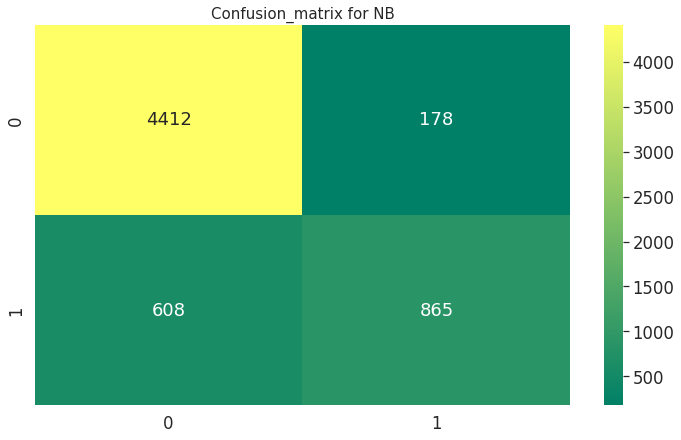

In [317]:
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)

In [346]:
clf = RandomForestClassifier(criterion='entropy',
n_estimators=700,
min_samples_split=10,
min_samples_leaf=1,
max_features='auto',
oob_score=True,
random_state=1,
n_jobs=-1)

In [347]:
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train, np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

RF Accuracy: 99.21%


In [348]:
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))

The cross validated score for Random forest is: 99.32


Text(0.5, 1.05, 'Confusion_matrix for RF')

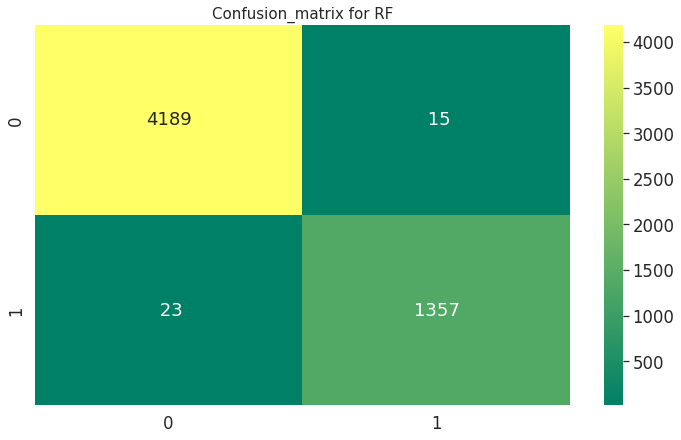

In [349]:
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [350]:
val

,id,goal,period,text_am,n_img,n_vid,n_pled_t,mean_pled_t,cr_time,backed,created,rpg,platformer,shooter,fighting,survival,horror,strategy,arcade,simulator,mmo,indie,action,quest,adventure,success,is_site
0,4812,125.00,30,418,0,0,6,11.333333,32,5,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2802,772.50,30,305,13,1,5,35.022000,551,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,2326,5376.83,30,158,0,0,5,33.156000,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3683,825.31,31,1103,14,1,10,124.256000,21,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,4229,90000.00,31,1546,16,1,11,578.636364,33,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,5358,16775.00,60,136,0,0,4,13.722500,594,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2116,8440,100000.00,30,567,0,1,4,262.500000,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2117,8073,60750.00,29,369,4,0,8,1903.250000,385,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2118,6551,21500.00,30,3508,51,0,14,96.428571,388,5,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1


In [351]:
val1 = val
val1 = val1[['id','success']]
val1

,id,success
0,4812,0
1,2802,1
2,2326,0
3,3683,1
4,4229,1
...,...,...
2115,5358,0
2116,8440,0
2117,8073,0
2118,6551,0


In [352]:
val = val.drop('success', 1)

In [353]:
predict = clf.predict(val)
submission = pd.DataFrame({
    "Id": val["id"],
    "success": predict
})
#submission.to_csv("submission.csv", index=False)

In [354]:
submission

,Id,success
0,4812,0
1,2802,1
2,2326,0
3,3683,1
4,4229,1
...,...,...
2115,5358,0
2116,8440,0
2117,8073,0
2118,6551,0


In [355]:
valList = val1['success'].tolist()
subList = submission['success'].tolist()

In [356]:
score = 0
for i in valList:
  if valList[i] == subList[i]:
    score +=1
score = score / submission.shape[0]
score

1.0